In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edges data
edges_file = 'email-Eu-core.txt'
edges_df = pd.read_csv(edges_file, sep=' ', header=None, names=['node_1', 'node_2'])

# Load the labels data
labels_file = 'email-Eu-core-department-labels.txt'
labels_df = pd.read_csv(labels_file, sep=' ', header=None, names=['node', 'department'])

# Display the first few rows of each DataFrame
print("Edges DataFrame:")
print(edges_df.head())

print("\nLabels DataFrame:")
print(labels_df.head())


Edges DataFrame:
   node_1  node_2
0       0       1
1       2       3
2       2       4
3       5       6
4       5       7

Labels DataFrame:
   node  department
0     0           1
1     1           1
2     2          21
3     3          21
4     4          21


In [2]:
# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Check basic properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 1005
Number of edges: 16706


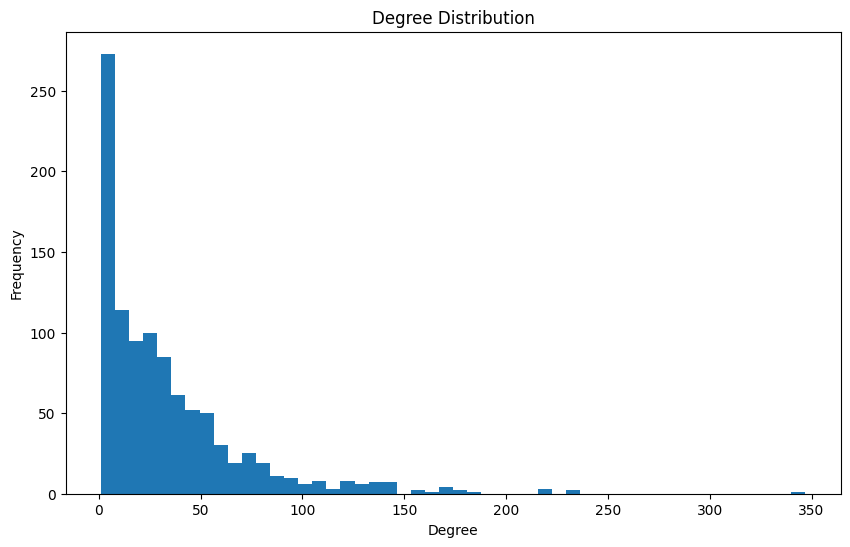

In [3]:
# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


Missing labels: 0


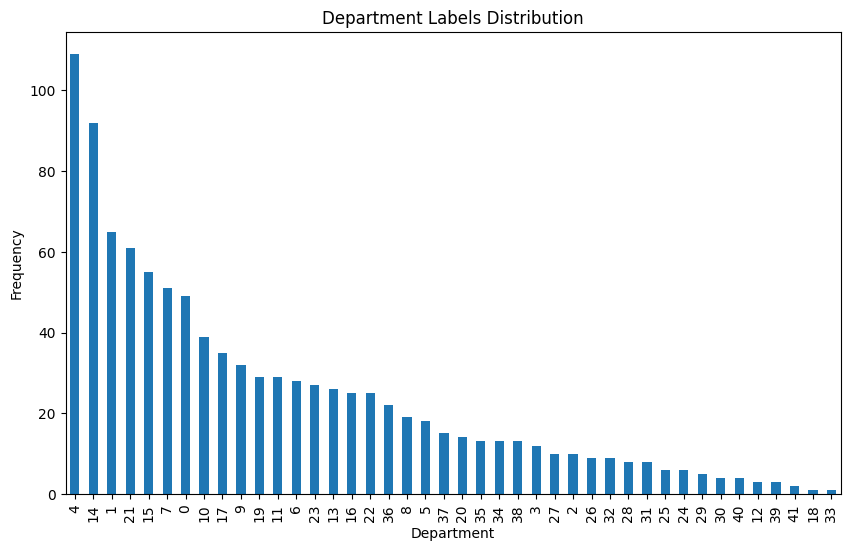

In [4]:
# Merge the labels with the graph data
nodes_data = pd.DataFrame(G.nodes(), columns=['node'])
nodes_data = nodes_data.merge(labels_df, on='node', how='left')

# Check for missing labels
missing_labels = nodes_data['department'].isnull().sum()
print(f"Missing labels: {missing_labels}")

# Visualize department distribution
plt.figure(figsize=(10, 6))
nodes_data['department'].value_counts().plot(kind='bar')
plt.title('Department Labels Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()


Computing resilience for the graph by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000


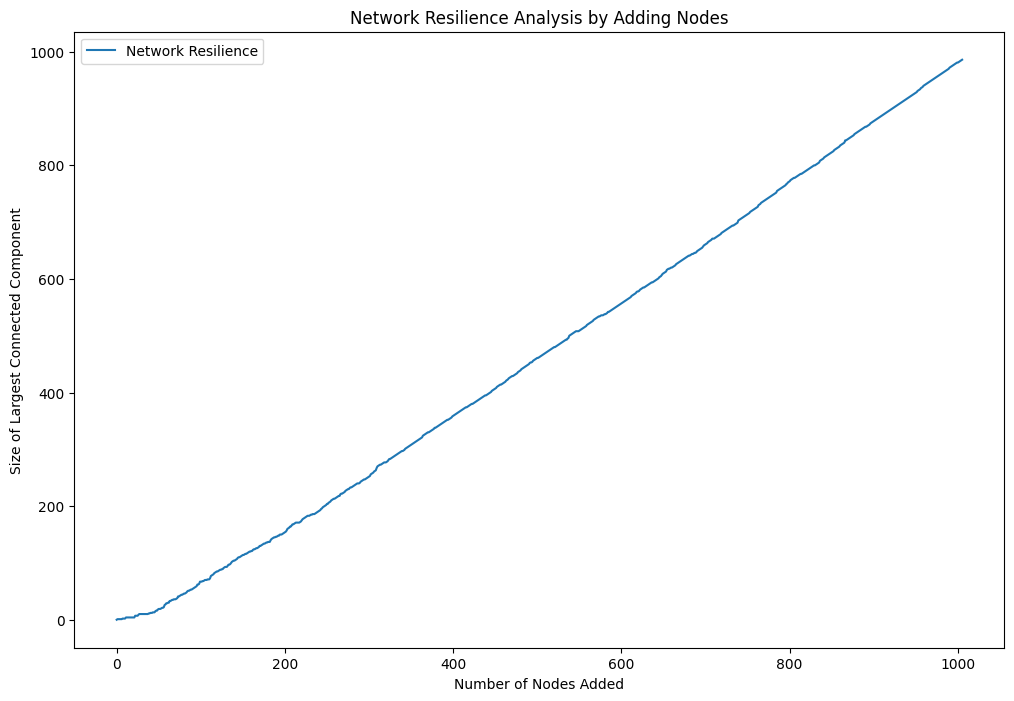

In [6]:
import random
def random_order(graph):
    """
    Generate a random order of nodes for adding to the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random order for adding nodes
attack_order = random_order(G)

# Compute resilience by adding nodes
print("Computing resilience for the graph by adding nodes...")
resilience = compute_resilience_adding_nodes(G, attack_order)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience, label='Network Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Resilience Analysis by Adding Nodes')
plt.legend()
plt.show()


In [8]:
import numpy as np
def generate_chung_lu(graph):
    """
    Generate a Chung Lu graph model based on the degree distribution of the input graph.
    """
    degree_sequence = [degree for node, degree in graph.degree()]
    W = np.array(degree_sequence)
    n = len(W)
    CL_graph = nx.Graph()
    CL_graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.rand() < (W[i] * W[j]) / (2 * sum(W)):
                CL_graph.add_edge(i, j)
    return CL_graph

def UPA_graph(n, m):
    """
    Generate an UPA graph using NetworkX's powerlaw_cluster_graph.
    """
    return nx.powerlaw_cluster_graph(n, m, 0.0)

# Generate Chung-Lu and UPA models
chung_lu_graph = generate_chung_lu(G)
upa_graph = UPA_graph(G.number_of_nodes(), 3)  # Adjust 'm' based on the average degree of the original graph


Computing resilience for the original graph by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the Chung Lu model by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the UPA model by adding nodes...
Progress: 10.0% - Nodes processed:

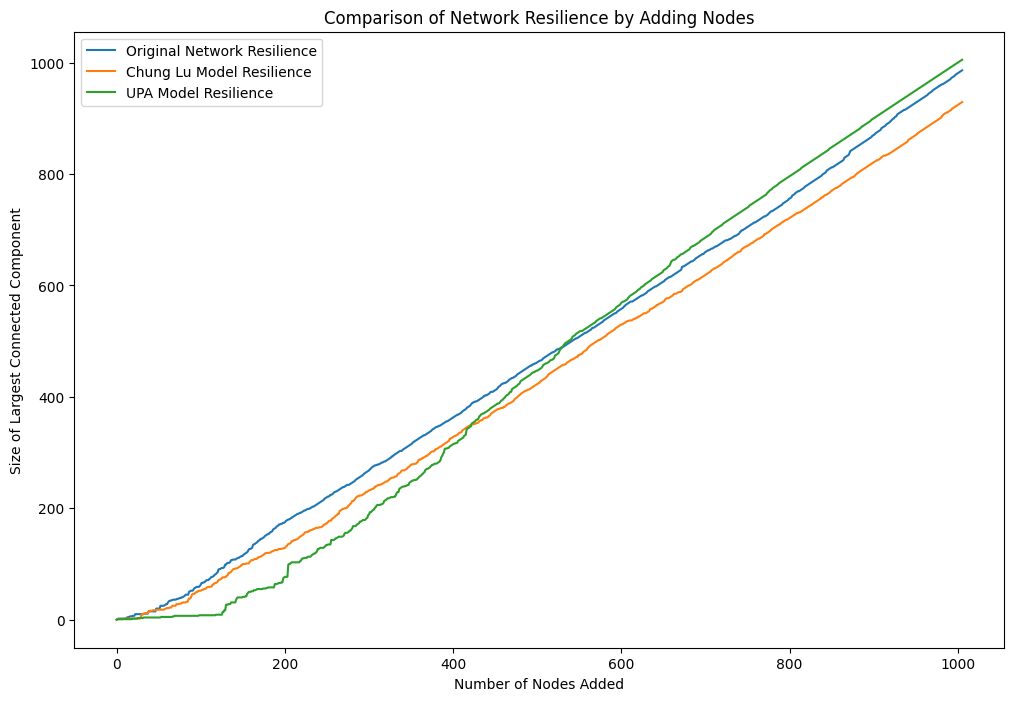

In [9]:
def random_order(graph):
    """
    Generate a random order of nodes for adding to the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random order for adding nodes
attack_order_original = random_order(G)
attack_order_cl = random_order(chung_lu_graph)
attack_order_upa = random_order(upa_graph)

# Compute resilience by adding nodes
print("Computing resilience for the original graph by adding nodes...")
resilience_original = compute_resilience_adding_nodes(G, attack_order_original)
print("Computing resilience for the Chung Lu model by adding nodes...")
resilience_cl = compute_resilience_adding_nodes(chung_lu_graph, attack_order_cl)
print("Computing resilience for the UPA model by adding nodes...")
resilience_upa = compute_resilience_adding_nodes(upa_graph, attack_order_upa)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes')
plt.legend()
plt.show()
